In [1]:
# loading data
import importlib
import load_transform_pipeline #import the module here, so that it can be reloaded.
importlib.reload(load_transform_pipeline)
import pickle
file_path = '../models/data.pkl'
data = pickle.load(open(file_path, 'rb'))

X_train_df = data['X_train_df']
X_test_df = data['X_test_df']

X_train = data['X_train']
X_test = data['X_test']

y_train = data['y_train']
y_test = data['y_test']

X_val=data['X_val']
y_val=data['y_val'] 

transform_pipeline = data['transform_pipeline']

C:\Users\danto\Anaconda3\envs\IA\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
C:\Users\danto\Anaconda3\envs\IA\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.preprocessing.data module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.preprocessing. Anything that cannot be imported from sklearn.preprocessing is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\danto\Anaconda3\envs\IA\lib\site-packages\sklearn\base.py:313: UserWarning: Trying to unpickle estimator S

In [2]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score

In [3]:
def lgb_r2_score(dtrain,preds):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds), True

In [4]:
""""hyper_params = {
    'task': 'train',
    'boosting_type': 'dart',
    'objective': 'regression',
    'metric': 'mean squared error',
    'learning_rate': 0.005,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth":8 ,
    "num_leaves": 75,  
    "max_bin": 300,
    "num_iterations": 1000,
    "n_estimators": 1000,
    'reg_alpha':0.8,
    'reg_lambda':0.6
}

gbm = lgb.LGBMRegressor(**hyper_params) """

In [98]:
gbm = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.25,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)



In [99]:
gbm.fit(X_train, y_train ,
        eval_set=[(X_val, y_val)], eval_metric='l1')

[1]	valid_0's l1: 56.0244	valid_0's l2: 6166.98
[2]	valid_0's l1: 55.033	valid_0's l2: 5980.45
[3]	valid_0's l1: 54.1236	valid_0's l2: 5810.93
[4]	valid_0's l1: 53.1541	valid_0's l2: 5633.55
[5]	valid_0's l1: 52.2204	valid_0's l2: 5466.58
[6]	valid_0's l1: 51.5271	valid_0's l2: 5347.11
[7]	valid_0's l1: 50.7654	valid_0's l2: 5213.51
[8]	valid_0's l1: 50.1062	valid_0's l2: 5104.91
[9]	valid_0's l1: 49.489	valid_0's l2: 5000.4
[10]	valid_0's l1: 48.937	valid_0's l2: 4901.97
[11]	valid_0's l1: 48.4475	valid_0's l2: 4831.57
[12]	valid_0's l1: 47.9052	valid_0's l2: 4745.52
[13]	valid_0's l1: 47.5166	valid_0's l2: 4684.46
[14]	valid_0's l1: 47.0613	valid_0's l2: 4610.18
[15]	valid_0's l1: 46.6315	valid_0's l2: 4546.15
[16]	valid_0's l1: 46.2784	valid_0's l2: 4493.56
[17]	valid_0's l1: 45.892	valid_0's l2: 4426.96
[18]	valid_0's l1: 45.6024	valid_0's l2: 4376.08
[19]	valid_0's l1: 45.3228	valid_0's l2: 4335.17
[20]	valid_0's l1: 45.0226	valid_0's l2: 4285.42
[21]	valid_0's l1: 44.7712	valid_0

LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
              boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              feature_fraction=0.25, feature_fraction_seed=9,
              importance_type='split', learning_rate=0.05, max_bin=55,
              max_depth=-1, min_child_samples=20, min_child_weight=0.001,
              min_data_in_leaf=6, min_split_gain=0.0,
              min_sum_hessian_in_leaf=11, n_estimators=720, n_jobs=-1,
              num_leaves=5, objective='regression', random_state=None,
              reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [100]:
y_train_predicted = gbm.predict(X_train, num_iteration=gbm.best_iteration_)
print('train:', r2_score(y_train, y_train_predicted))

train: 0.6492273195761633


In [101]:
y_test_predicted = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
print('test:', r2_score(y_test, y_test_predicted))

test: 0.6056487972989808


In [ ]:
import numpy as np
r2_test=[]
r2_train=[]
for i in range (1,720,1):
    
    gbm = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=i,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.25,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
    
    gbm.fit(X_train, y_train ,eval_set=[(X_val, y_val)], eval_metric='l1')
    
    
    y_pred=gbm.predict(X_test)
    cal_rmse=r2_score(y_test,y_pred)
    np.array(r2_test.append(cal_rmse))

    y_pred_train=gbm.predict(X_train)
    train_rmse=r2_score(y_train,y_pred_train)
    np.array(r2_train.append(train_rmse))

   

[1]	valid_0's l1: 56.0244	valid_0's l2: 6166.98
[1]	valid_0's l1: 56.0244	valid_0's l2: 6166.98
[2]	valid_0's l1: 55.033	valid_0's l2: 5980.45
[1]	valid_0's l1: 56.0244	valid_0's l2: 6166.98
[2]	valid_0's l1: 55.033	valid_0's l2: 5980.45
[3]	valid_0's l1: 54.1236	valid_0's l2: 5810.93
[1]	valid_0's l1: 56.0244	valid_0's l2: 6166.98
[2]	valid_0's l1: 55.033	valid_0's l2: 5980.45
[3]	valid_0's l1: 54.1236	valid_0's l2: 5810.93
[4]	valid_0's l1: 53.1541	valid_0's l2: 5633.55
[1]	valid_0's l1: 56.0244	valid_0's l2: 6166.98
[2]	valid_0's l1: 55.033	valid_0's l2: 5980.45
[3]	valid_0's l1: 54.1236	valid_0's l2: 5810.93
[4]	valid_0's l1: 53.1541	valid_0's l2: 5633.55
[5]	valid_0's l1: 52.2204	valid_0's l2: 5466.58
[1]	valid_0's l1: 56.0244	valid_0's l2: 6166.98
[2]	valid_0's l1: 55.033	valid_0's l2: 5980.45
[3]	valid_0's l1: 54.1236	valid_0's l2: 5810.93
[4]	valid_0's l1: 53.1541	valid_0's l2: 5633.55
[5]	valid_0's l1: 52.2204	valid_0's l2: 5466.58
[6]	valid_0's l1: 51.5271	valid_0's l2: 5347.

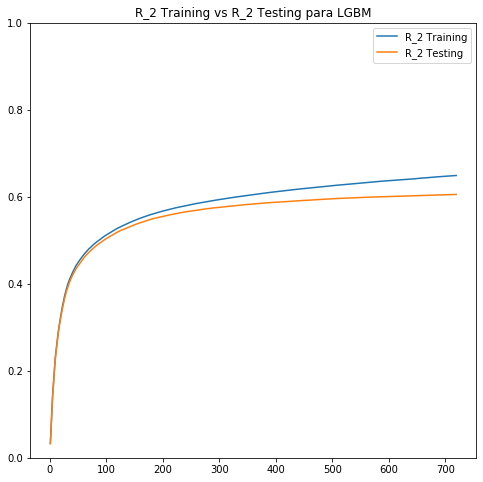

In [120]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.figure(figsize=(8,8))
plt.plot(range(1,720,1), r2_train, label='R_2 Training')
plt.plot(range(1,720,1), r2_test, label='R_2 Testing')
plt.ylim((0, 1))
plt.legend(loc="best")
plt.title("R_2 Training vs R_2 Testing para LGBM")
plt.show()

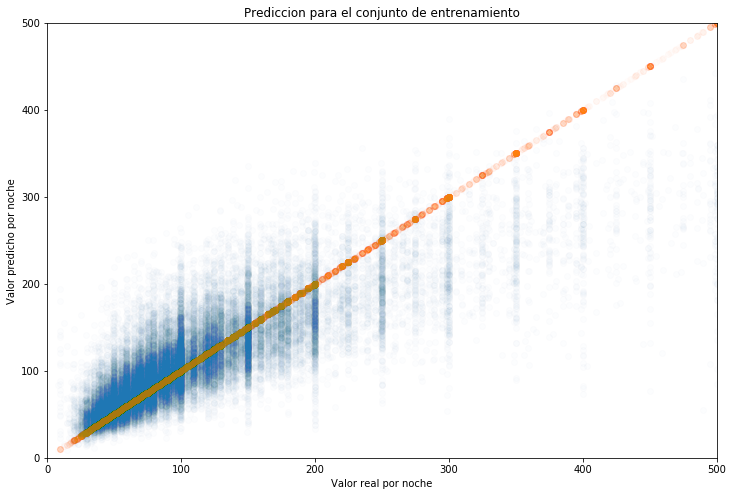

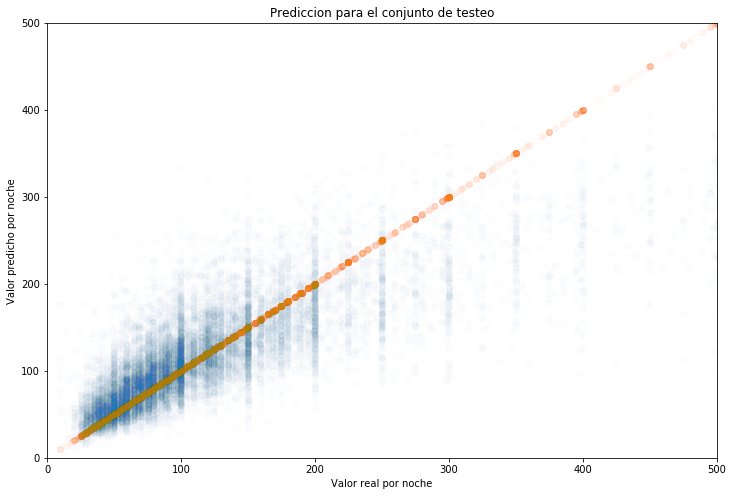

In [121]:
lims = (0, 500)
alpha = .01

plt.figure(figsize=(12,8))
plt.scatter(y_train, y_train_predicted, alpha=alpha)
plt.scatter(y_train, y_train, alpha=alpha)
plt.xlabel('Valor real por noche')
plt.ylabel('Valor predicho por noche')
plt.xlim(lims)
plt.ylim(lims)
plt.title("Prediccion para el conjunto de entrenamiento")
plt.show()


plt.figure(figsize=(12,8))
plt.scatter(y_test, y_test_predicted, alpha=alpha)
plt.scatter(y_test, y_test, alpha=alpha)
plt.xlabel('Valor real por noche')
plt.ylabel('Valor predicho por noche')
plt.xlim(lims)
plt.ylim(lims)
plt.title("Prediccion para el conjunto de testeo")
plt.show()

#### Fuente
https://medium.com/@pushkarmandot/https-medium-com-pushkarmandot-what-is-lightgbm-how-to-implement-it-how-to-fine-tune-the-parameters-60347819b7fc 

https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/mean-squared-logarithmic-error-(msle)

https://iartificial.net/error-cuadratico-medio-para-regresion/

http://mkhalusova.github.io/blog/2019/04/17/ml-model-evaluation-metrics-p3#rmsle   

https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html

What is LightGBM, How to implement it? How to fine tune the parameters?: https://medium.com/@pushkarmandot/https-medium-com-pushkarmandot-what-is-lightgbm-how-to-implement-it-how-to-fine-tune-the-parameters-60347819b7fc